<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Guia 7 Práctica IC 2023

# Ejercicio 1:
Implemente un algoritmo de optimizacion por enjambre de partıculas
y utilıcelo para encontrar el mınimo global de las funciones del Ejercicio 1 de la Guıa de trabajos practicos 6.
Compare los resultados en relacion a los obtenidos con algoritmos geneticos, en terminos de las soluciones encontradas y la velocidad de convergencia.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(np.random.rand(2,1))

[[0.13150504]
 [0.26788032]]


In [ ]:
def f1(x):
  x = x[0]
  return (-1)*x*np.sin(np.sqrt(np.abs(x)))
def f2(v):
  x=v[0]; y=v[1]
  return ((x**2 + y**2)**(0.25))*( np.sin(50*((x**2 + y**2)**(0.1)))**2 + 1)

In [ ]:
def enjambre(particulas,f,c1,c2,minimo_buscado,iter_max,max,min):
    cantidad_particulas,dimensiones =particulas.shape
    particulas_mejor_posicion_individual = particulas
    mejor_posicion_global = particulas[0]
    # velocidad_particulas = (np.random.rand(cantidad_particulas,dimensiones)-0.5)
    velocidad_particulas = np.zeros((cantidad_particulas,dimensiones))
    iter = 0
    while(iter != iter_max):
        for i in np.arange(0,cantidad_particulas):
            if (f(particulas[i])<f(particulas_mejor_posicion_individual[i])):
                particulas_mejor_posicion_individual[i] = particulas[i].copy()
            if (f(particulas_mejor_posicion_individual[i])<f(mejor_posicion_global)):
                mejor_posicion_global = particulas_mejor_posicion_individual[i].copy()
        for i in np.arange(cantidad_particulas):
            for j in np.arange(dimensiones):
                r = np.random.rand(2)
                velocidad_particulas[i][j]+= c1*r[0]*(particulas_mejor_posicion_individual[i][j]-particulas[i][j]) + c2*r[1]*(mejor_posicion_global[j]-particulas[i][j])
                particulas[i][j] += velocidad_particulas[i][j]
                if(particulas[i][j]>max[j]):
                  particulas[i][j]=max[j]
                elif (particulas[i][j]<min[j]):
                 particulas[i][j]=min[j]
        iter +=1
    return mejor_posicion_global,iter

In [ ]:
cantidad_particulas = 20
dimensiones = 1
minimo_buscado = -400
particulas = (np.random.rand(cantidad_particulas,dimensiones)*500) - 500
c1 = 0.01 ; c2= 0.01 ; iter_max = 200
mejor_posicion_global,iter = enjambre(particulas,f1,c1,c2,minimo_buscado,iter_max,[512],[-1000])

Cantidad de iteraciones:  200
Individuo con mejor posicion:  [-894.78344692]
Mejor posicion encontrada:  -892.7275925143468


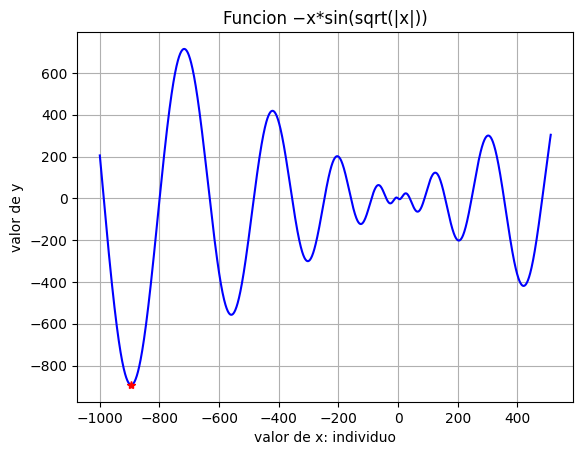

In [ ]:
print('Cantidad de iteraciones: ',iter)
print('Individuo con mejor posicion: ',mejor_posicion_global)
print('Mejor posicion encontrada: ',f1(mejor_posicion_global))
x = np.linspace(-1000, 512,num=2000)
y = f1([x])
plt.plot(x,y,'b-')
plt.plot(mejor_posicion_global,f1(mejor_posicion_global),'*r')
plt.title('Funcion −x*sin(sqrt(|x|))')
plt.xlabel('valor de x: individuo')
plt.ylabel('valor de y')
plt.grid() ;plt.show()

In [ ]:
cantidad_particulas = 200
dimensiones = 2
minimo_buscado = 1.5
particulas = (np.random.rand(cantidad_particulas,dimensiones)*500 - 250)

c1 =  0.01; c2= 0.01 ; iter_max = 1000
mejor_posicion_global,iter = enjambre(particulas,f2,c1,c2,minimo_buscado,iter_max,[100,100],[-100,-100])

Cantidad de iteraciones:  1000
Individuo con mejor fitness:  [0.05289254 0.02549562]
Mejor fitness encontrado:  0.24413275294924872


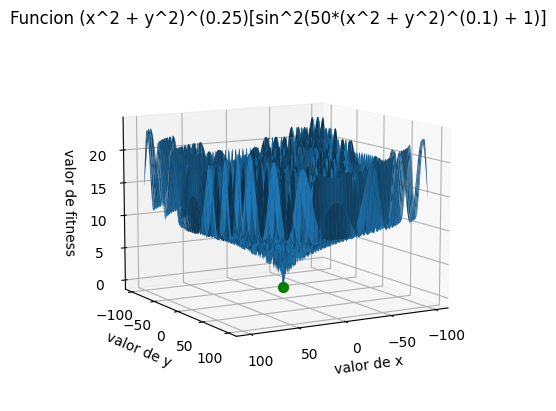

In [ ]:
print('Cantidad de iteraciones: ',iter)
print('Individuo con mejor fitness: ',mejor_posicion_global)
print('Mejor fitness encontrado: ',f2(mejor_posicion_global))
x = y = np.linspace(-100, 100,num=200)
x, y = np.meshgrid(x, y)
z = f2([x,y])
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(x, y, z)
ax.scatter(mejor_posicion_global[0], mejor_posicion_global[1], f2([mejor_posicion_global[0],mejor_posicion_global[1]]), color='green', s=50)
ax.set_title('Funcion (x^2 + y^2)^(0.25)[sin^2(50*(x^2 + y^2)^(0.1) + 1)]')
ax.set_xlabel('valor de x')
ax.set_ylabel('valor de y')
ax.set_zlabel('valor de fitness')
ax.view_init(elev=10, azim=60) ; plt.show()

# Ejercicio 2:
Suponga que un viajante tiene que visitar n ciudades en el menor
tiempo posible.  

*   Considere una matriz D de tamaño n×n
*   cuyos elementos dpq denotan la distancia entre cada par de ciudades (p, q)
*   Se define un recorrido como una trayectoria cerrada que visita cada ciudad una y solo una vez (a excepcion de la ciudad de partida, a la cual debe regresar)

El problema consiste en hallar el recorrido de mınima longitud.
Analice el efecto de la tasa de evaporacion (ρ) y de la cantidad de feromona depositada (τ ) sobre los resultados de la busqueda. Para esto ultimo compare el desempeño del algoritmo empleando los metodos global, local y uniforme para deposito de feromonas.

In [2]:
# funcion que se encarga de calcular el proximo nodo a partir de las probabilidades de aquellos noods que no visito la hormiga
def calcular_proximo_nodo(a,b,nodo_i,matriz_feromonas,nodos_sin_visitar,d):
  probabilidades = np.full(len(nodos_sin_visitar),0.0)
  for j in np.arange(0,len(nodos_sin_visitar)):
    nodo_j = nodos_sin_visitar[j]
    probabilidad_j = (matriz_feromonas[nodo_i,nodo_j]**a) * ((1 / d[nodo_i,nodo_j])**b)
    sumatoria_feromonas = np.sum( (matriz_feromonas[nodo_i,nodos_sin_visitar]**a)*((1 / d[nodo_i,nodo_j])**b) )
    probabilidad_j = probabilidad_j / sumatoria_feromonas
    probabilidades[j] =  probabilidad_j
  proximo_nodo = np.random.choice(nodos_sin_visitar,p=probabilidades)
  nodos_sin_visitar2 = np.delete(nodos_sin_visitar,nodos_sin_visitar == proximo_nodo)

  return proximo_nodo,nodos_sin_visitar2

In [3]:
def calcular_longitudes_caminos(c,d):
  cant_caminos = len(c)
  distancias = np.zeros(cant_caminos)
  for i in np.arange(0,cant_caminos):
    sum = 0
    for j in np.arange(0,len(c[i])-1):
      sum+= d[int(c[i][j]),int(c[i][j+1])]
    distancias[i]+= sum
  return distancias

In [4]:
# funcion que le paso los caminos que tomaron las hormigas y las distancias entre nodos retorna el camino cuya distancia es mejor
def calcular_mejor_camino(c,d):
  longitudes = calcular_longitudes_caminos(c,d)
  ind_min_dist = np.argmin(longitudes)
  return c[ind_min_dist]

In [5]:
# funcion que se retorna verdadero si los caminos de las hormigas son el mismo
def mismo_camino(c):
  bandera = True
  for i in np.arange(1,len(c)):
    if np.array_equal(c[0],c[i]) == False:
      bandera = False
      break
  return bandera

In [6]:
# Algoritmo 2: Sistema de hormigas (AS)
def sistemas_hormigas(cant_hormigas,tipo_feromona,Q,a,b,p_feromona,distancias,max_iteraciones):

  # PASO 1:
  size_d = len(distancias)                    # tamaño de la matriz d -> d = matriz de distancias
  feromonas = np.random.rand(size_d,size_d)+Q   # σij: feromonas en la conexión entre i y j

  # PASO 2:
  caminos = np.full(cant_hormigas,None)       # caminos de cada una de las hormigas

  # PASO 3:
  iteracion = 0
  bandera = False
  while iteracion < max_iteraciones and bandera == False:
    # PASO 3.1: para cada hormiga k = 1, 2, . . . ,N
    for k in np.arange(0,cant_hormigas):
      # PASO 3.1.1:
      camino_actual_k = np.zeros(size_d+1,dtype=int) # agrego al final el nodo inicial tambien porque tengo que finalizar en el mismo que arranque
      nodos_por_visitar = np.arange(1,size_d,dtype=int) # lista con todos los vecinos posibles a visitar, no pongo el 0 porque ahi arranca
      # PASO 3.1.2: repetir hasta alcanzar el destino -> repito la misma cantidad de destinos, ya que tengo que recorrerlos a todos
      for i in np.arange(1,size_d):
        # seleccionar el próximo nodo según la probabilidad ->
        # le paso el nodo actual, la matriz de feromonas y la lista de no visitados y la matriz de distancia
        proximo_nodo,nodos_por_visitar2 = calcular_proximo_nodo(a,b,int(camino_actual_k[i-1]),feromonas,nodos_por_visitar,distancias)
        nodos_por_visitar = nodos_por_visitar2.copy()
        # agregar un paso (i, j) al camino pk(t)
        camino_actual_k[i] = proximo_nodo.copy()
      # agrego el camino de la hormiga a la lista
      caminos[k] = camino_actual_k.copy()


    # PASO 3.1.3: calcular la longitud del camino econtrado f(pk(t))
    longitudes_caminos = calcular_longitudes_caminos(caminos,distancias)

    # PASO 3.2: para cada conexión (i, j)
    # reducir por evaporación la cantidad de feromonas: σij(t) ← (1 − ρ)σij(t)
    feromonas = feromonas*(1-p_feromona)
    for k in np.arange(0,len(caminos)):
      # depositar feromonas proporcionalmente a la bondad de la solución
      #     # tipo_feromona == 0 -> uniforme Q
      #     # tipo_feromona == 1 -> global = d_feromona = Q/f(pk(t))
      #     # tipo_feromona == 2 -> local Q/dij
      camino_hormiga_actual = caminos[k]
      if tipo_feromona == 1:
        d_feromona = Q / calcular_longitudes_caminos([camino_hormiga_actual],distancias)
        for i in np.arange(0,size_d):
          feromonas[camino_hormiga_actual[i],camino_hormiga_actual[i+1]]+= d_feromona
      elif tipo_feromona == 2:
        for i in np.arange(0,size_d):
          d_feromona = Q / distancias[camino_hormiga_actual[i],camino_hormiga_actual[i+1]]
          feromonas[camino_hormiga_actual[i],camino_hormiga_actual[i+1]]+= d_feromona
      else:
        d_feromona = Q
        for i in np.arange(0,size_d):
          feromonas[camino_hormiga_actual[i],camino_hormiga_actual[i+1]]+= d_feromona
    mejor_camino = calcular_mejor_camino(caminos,distancias)
    print('dist mejor camino: ',calcular_longitudes_caminos([mejor_camino],distancias))
    if mismo_camino(caminos) == True:
      bandera = True
      mejor_camino = calcular_mejor_camino(caminos,distancias)
      print('MEJOR CAMINO ENCONTRADO: ',mejor_camino)
    iteracion+=1
  print('caminos: ')
  print(caminos)
  plt.imshow(feromonas)
  plt.show()
  return mejor_camino,iteracion

In [8]:
# importar los datos de la matriz d
D = np.genfromtxt("gr17.csv", delimiter="," )
# dmin = 2085
# [0 3 12 6 7 5 16 ]

dist mejor camino:  [4170.]
dist mejor camino:  [3650.]
dist mejor camino:  [3810.]
dist mejor camino:  [3952.]
dist mejor camino:  [3655.]
dist mejor camino:  [3964.]
dist mejor camino:  [4027.]
dist mejor camino:  [4090.]
dist mejor camino:  [4047.]
dist mejor camino:  [3790.]
dist mejor camino:  [4029.]
dist mejor camino:  [3990.]
dist mejor camino:  [3919.]
dist mejor camino:  [3942.]
dist mejor camino:  [3734.]
dist mejor camino:  [3991.]
dist mejor camino:  [4315.]
dist mejor camino:  [4158.]
dist mejor camino:  [3965.]
dist mejor camino:  [4206.]
dist mejor camino:  [3842.]
dist mejor camino:  [3827.]
dist mejor camino:  [4141.]
dist mejor camino:  [4466.]
dist mejor camino:  [3659.]
dist mejor camino:  [3694.]
dist mejor camino:  [3671.]
dist mejor camino:  [4098.]
dist mejor camino:  [3968.]
dist mejor camino:  [3817.]
dist mejor camino:  [3821.]
dist mejor camino:  [3742.]
dist mejor camino:  [3724.]
dist mejor camino:  [3656.]
dist mejor camino:  [3919.]
dist mejor camino:  

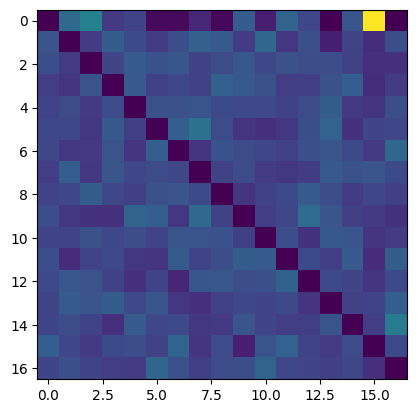

cantidad de iteraciones:  2000
mejor camino encontrado feromona uniforme:  [ 0 12  7 13  1 15 11  8 14  6  3 16  4  9  5 10  2  0]
distancia optima: 2085 - distancia del mejor camino:  [3888.]


In [40]:
# UNIFORME
cantidad_hormigas = 15     # cantidad de hormigas
feromona = 0               # tipo de feromona que van a dejar -> 0 uniforme, 1 global, 2 local
delta_feromona = 0.01      # constante para la evaporacion de feromona
max_it = 2000
a = 1
b = 0.1
Q = 1

mejor_camino0,iter0 = sistemas_hormigas(cantidad_hormigas,feromona,Q,a,b,delta_feromona,D,max_it)

print('cantidad de iteraciones: ',iter0)
print('mejor camino encontrado feromona uniforme: ',mejor_camino0)
print('distancia optima: 2085 - distancia del mejor camino: ',calcular_longitudes_caminos([mejor_camino0],D))

dist mejor camino:  [3840.]
dist mejor camino:  [3315.]
dist mejor camino:  [3811.]
dist mejor camino:  [4094.]
dist mejor camino:  [3399.]
dist mejor camino:  [3118.]
dist mejor camino:  [3451.]
dist mejor camino:  [3624.]
dist mejor camino:  [3541.]
dist mejor camino:  [3461.]
dist mejor camino:  [3318.]
dist mejor camino:  [3871.]
dist mejor camino:  [3823.]
dist mejor camino:  [4046.]
dist mejor camino:  [4039.]
dist mejor camino:  [3856.]
dist mejor camino:  [3808.]
dist mejor camino:  [3480.]
dist mejor camino:  [3999.]
dist mejor camino:  [4205.]
dist mejor camino:  [3882.]
dist mejor camino:  [3802.]
dist mejor camino:  [3765.]
dist mejor camino:  [3661.]
dist mejor camino:  [3677.]
dist mejor camino:  [3828.]
dist mejor camino:  [3819.]
dist mejor camino:  [3927.]
dist mejor camino:  [3554.]
dist mejor camino:  [3897.]
dist mejor camino:  [4073.]
dist mejor camino:  [3731.]
dist mejor camino:  [3686.]
dist mejor camino:  [3744.]
dist mejor camino:  [3720.]
dist mejor camino:  

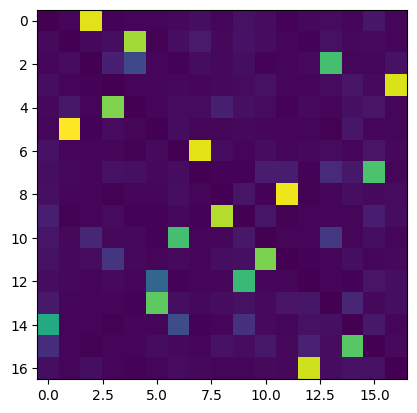

cantidad de iteraciones:  64
mejor camino encontrado feromona global:  [ 0  2 13  5  1  4  3 16 12  9  8 11 10  6  7 15 14  0]
distancia del mejor camino:  [4558.]


In [36]:
# GLOBAL
cantidad_hormigas = 25     # cantidad de hormigas
feromona = 1               # tipo de feromona que van a dejar -> 0 uniforme, 1 global, 2 local
delta_feromona = 0.1       # constante para la evaporacion de feromona
max_it = 2000
a = 5
b = 1
Q = 10
mejor_camino1,iter1 = sistemas_hormigas(cantidad_hormigas,feromona,Q,a,b,delta_feromona,D,max_it)

print('cantidad de iteraciones: ',iter1)
print('mejor camino encontrado feromona global: ',mejor_camino1)
print('distancia del mejor camino: ',calcular_longitudes_caminos([mejor_camino1],D))

dist mejor camino:  [4261.]
dist mejor camino:  [3603.]
dist mejor camino:  [3854.]
dist mejor camino:  [3567.]
dist mejor camino:  [3950.]
dist mejor camino:  [3823.]
dist mejor camino:  [3774.]
dist mejor camino:  [3860.]
dist mejor camino:  [3899.]
dist mejor camino:  [4173.]
dist mejor camino:  [3713.]
dist mejor camino:  [3942.]
dist mejor camino:  [3779.]
dist mejor camino:  [3809.]
dist mejor camino:  [3635.]
dist mejor camino:  [3443.]
dist mejor camino:  [3609.]
dist mejor camino:  [3592.]
dist mejor camino:  [3754.]
dist mejor camino:  [2640.]
dist mejor camino:  [3604.]
dist mejor camino:  [3270.]
dist mejor camino:  [3487.]
dist mejor camino:  [3357.]
dist mejor camino:  [3504.]
dist mejor camino:  [3316.]
dist mejor camino:  [3409.]
dist mejor camino:  [3156.]
dist mejor camino:  [2740.]
dist mejor camino:  [3123.]
dist mejor camino:  [3117.]
dist mejor camino:  [3015.]
dist mejor camino:  [2751.]
dist mejor camino:  [3149.]
dist mejor camino:  [3198.]
dist mejor camino:  

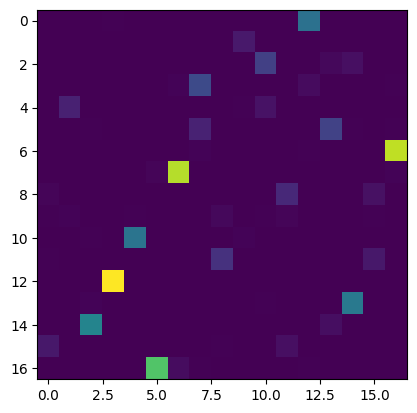

cantidad de iteraciones:  176
mejor camino encontrado feromona local:  [ 0 12  3  7  6 16  5 13 14  2 10  4  1  9  8 11 15  0]
distancia del mejor camino:  [2190.]


In [21]:
# LOCAL
cantidad_hormigas = 15     # cantidad de hormigas
feromona = 2               # tipo de feromona que van a dejar -> 0 uniforme, 1 global, 2 local
delta_feromona = 0.01       # constante para la evaporacion de feromona
max_it = 2000
a = 3
b = 1
Q = 10

mejor_camino2,iter2 = sistemas_hormigas(cantidad_hormigas,feromona,Q,a,b,delta_feromona,D,max_it)

print('cantidad de iteraciones: ',iter2)
print('mejor camino encontrado feromona local: ',mejor_camino2)
print('distancia del mejor camino: ',calcular_longitudes_caminos([mejor_camino2],D))